## Předvýběr území na základě limitujících podmínek
Karolína Fenclová, Diplomová práce

Skript pro analýzu hodnot pro základní kritéria

In [3]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals
import pandas as pd

In [4]:
df = pd.read_csv(r"C:\fenclova\diplomka\analyza\vysledky\Nove_predvyber_vysledky34tis.csv").set_index('ID')
df.head()

,zeleznice_delka,vrstevnice_pocet,vodni_plohy_rozloha,dibA02_delka,relief_rozloha,zastavba_rozloha
ID,,,,,,
1,2916.80,268.0,100013.45,13477.08,197106.33,452304.47
2,1746.48,211.0,75317.79,11445.57,106362.35,598476.56
3,3037.87,273.0,102853.89,20013.60,27378.37,169553.29
4,1496.63,236.0,1253150.84,7025.02,609169.86,716973.51
5,6191.81,193.0,511724.21,15890.52,269874.62,317985.96


In [3]:
df.describe()

,zeleznice_delka,vrstevnice_pocet,vodni_plohy_rozloha,dibA02_delka,relief_rozloha,zastavba_rozloha
count,34166.000000,34166.000000,3.416600e+04,34166.000000,3.416600e+04,3.416600e+04
mean,5392.621366,119.364397,2.508810e+05,12096.330259,4.750117e+04,1.411995e+06
std,5862.627946,87.677140,4.994635e+05,5793.069204,3.359728e+05,1.445075e+06
min,0.230000,1.000000,1.000000e+00,0.000000,0.000000e+00,5.800000e-01
25%,2495.820000,54.000000,3.893772e+04,8151.820000,0.000000e+00,5.985002e+05
50%,4430.760000,98.000000,1.019114e+05,12080.370000,1.979600e+03,9.761296e+05
75%,6196.270000,162.000000,2.613735e+05,15804.592500,1.709619e+04,1.662835e+06
max,95250.270000,690.000000,1.017666e+07,41613.460000,1.159171e+07,1.535264e+07


In [1]:
# závislost délky železnice a rozlohy zástavby
a = df[df.zeleznice_delka <= 50000]
ax= a.sort_values(by=['zeleznice_delka']).plot(x='zeleznice_delka', 
                                                                y='zastavba_rozloha', 
                                                                kind='scatter', 
                                                                ylim=0, xlim=0, 
                                                                grid=True)

ax.set_ylabel(r'Rozloha zástavby [m$^2$]') 
# TODO pro graf změnit m2 na km2
ax.set_xlabel('Délka železnice [m]')
# TODO pro graf změnit m na km

NameError: name 'df' is not defined

Text(0,0.5,u'Po\u010det variant')

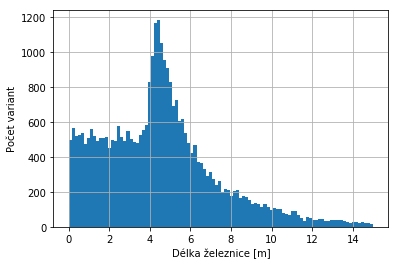

In [6]:
# histogram délky železnice
d = df.zeleznice_delka[df.zeleznice_delka <= 15000]
dx = (d/1000).hist(bins=100)
dx.set_xlabel('Délka železnice [m]')
dx.set_ylabel('Počet variant')
# TODO: jak nastavit rozsah os u histogramu?
# TODO: jak si poradit s rozdílnou šířkou sloupců? 

In [6]:
# PODMÍNKA: délka železnice
zeleznice_delka_min = 3000
zeleznice_delka_max = 10000

df[(df.zeleznice_delka >= zeleznice_delka_min) & (df.zeleznice_delka <= zeleznice_delka_max)].describe()

,zeleznice_delka,vrstevnice_pocet,vodni_plohy_rozloha,dibA02_delka,relief_rozloha,zastavba_rozloha
count,20815.000000,20815.000000,2.081500e+04,20815.000000,2.081500e+04,2.081500e+04
mean,5407.233793,117.967668,2.510802e+05,12364.169689,4.470903e+04,1.287449e+06
std,1625.858989,87.364416,4.927752e+05,5724.969691,3.107577e+05,1.093313e+06
min,3000.140000,1.000000,1.000000e+00,0.000000,0.000000e+00,4.043600e+02
25%,4232.315000,53.000000,4.303593e+04,8528.750000,0.000000e+00,6.243429e+05
50%,4980.100000,97.000000,1.065517e+05,12357.840000,1.903630e+03,9.979901e+05
75%,6301.100000,160.000000,2.595220e+05,16034.910000,1.670704e+04,1.608132e+06
max,9999.850000,637.000000,9.779810e+06,41292.720000,1.070742e+07,1.535264e+07


Text(0,0.5,u'Po\u010det variant')

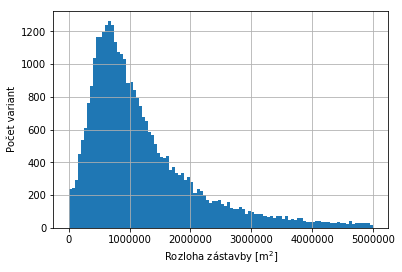

In [7]:
# histogram rozlohy zástavby
d = df.zastavba_rozloha[df.zastavba_rozloha <= 5*1000*1000] # 5km2
dx = d.hist(bins=100)
dx.set_xlabel('Rozloha zástavby [m$^2$]')
dx.set_ylabel('Počet variant')

In [8]:
# PODMÍNKA: výskyt zástavby
zastavba_rozloha_min = 0.2*1000*1000 #0,2 km2 ve skutečnosti (velmi řídké osídlení)
zastavba_rozloha_max = 2*1000*1000   #2km2 ve skutečnosti (1/8 území) 2cm2 v mapě 1 : 50 000 2*(2*500)**2

df[(df.zastavba_rozloha >= zastavba_rozloha_min) & (df.zastavba_rozloha <= zastavba_rozloha_max)].describe()


,zeleznice_delka,vrstevnice_pocet,vodni_plohy_rozloha,dibA02_delka,relief_rozloha,zastavba_rozloha
count,26635.000000,26635.000000,2.663500e+04,26635.000000,2.663500e+04,2.663500e+04
mean,4237.849545,119.878581,2.387247e+05,12460.291340,3.917639e+04,9.268750e+05
std,2879.848898,88.498321,5.116070e+05,5671.001322,2.661103e+05,4.472109e+05
min,0.230000,1.000000,1.000000e+00,0.000000,0.000000e+00,2.001099e+05
25%,2228.070000,55.000000,3.496526e+04,8680.950000,0.000000e+00,5.721779e+05
50%,4209.340000,98.000000,9.164713e+04,12526.690000,1.394580e+03,8.503664e+05
75%,5494.570000,161.000000,2.337868e+05,16129.020000,1.406489e+04,1.231483e+06
max,58807.290000,690.000000,1.017666e+07,41613.460000,9.731709e+06,1.999912e+06


In [ ]:
# železnice AND zástavba
df[(df.zeleznice_delka >= zeleznice_delka_min) & (df.zeleznice_delka <= zeleznice_delka_max) &
    (df.zastavba_rozloha >= zastavba_rozloha_min) & (df.zastavba_rozloha <= zastavba_rozloha_max)].describe()

,zeleznice_delka,vrstevnice_pocet,vodni_plohy_rozloha,dibA02_delka,relief_rozloha,zastavba_rozloha
count,16784.000000,16784.000000,1.678400e+04,16784.000000,1.678400e+04,1.678400e+04
mean,5260.653352,117.899428,2.462338e+05,12583.102898,3.853450e+04,9.552695e+05
std,1530.570492,88.400648,5.054949e+05,5682.130985,2.620018e+05,4.460329e+05
min,3000.140000,1.000000,1.000000e+00,0.000000,0.000000e+00,2.001099e+05
25%,4192.180000,53.000000,3.972783e+04,8810.182500,0.000000e+00,6.011838e+05
50%,4877.860000,96.000000,1.001702e+05,12627.885000,1.507170e+03,8.902476e+05
75%,6040.435000,158.000000,2.478518e+05,16265.507500,1.432223e+04,1.262935e+06
max,9996.430000,637.000000,9.779810e+06,41292.720000,9.731709e+06,1.999912e+06


In [ ]:
# histogram rozlohy skal a povrchové těžby
d = df.relief_rozloha[(df.relief_rozloha > 0) & (df.relief_rozloha <= 250*250)]
dx = d.hist(bins=100)
dx.set_xlabel('Rozloha skal a území povrchové těžby [m$^2$]')
dx.set_ylabel('Počet variant')

Text(0,0.5,u'Po\u010det variant')

In [ ]:
# PODMÍNKA: maximalni povolena rozloha skal a povrchové těžby
relief_rozloha_max = 1*250*250 # 1cm2 v mapě 1 : 25 000

df[(df.relief_rozloha <= relief_rozloha_max)].describe()


In [ ]:
# histogram rozlohy skal a povrchové těžby
d = df.vodni_plohy_rozloha[(df.vodni_plohy_rozloha < 5*500*500)]
dx = d.hist(bins=100)
dx.set_xlabel('Rozloha vodních ploch [m$^2$]')
dx.set_ylabel('Počet variant')

In [ ]:
# PODMÍNKA: výskyt vodní plochy
vodni_plohy_min = 500*500 # 1cm2 v mapě 1 : 50 000 (možno použít i při bližším neurčení, jestli je vodní plocha opravdu ideální nádrž)

df[(df.vodni_plohy_rozloha >= vodni_plohy_min)].describe()

In [ ]:
d = df.dibA02_delka #[(df.vodni_plohy_rozloha < 5*500*500)]
dx = d.hist(bins=100)
dx.set_xlabel('Délka vodních toků DMÚ25 [m]')
dx.set_ylabel('Počet variant')
# zde problém s vypovídající hodnotou dat = některé vodní toky jako vodní plochy

In [ ]:
# PODMÍNKA délka dibavod vodních toků
dibA02_delka_min = 5000 # zhruba průměr +- 7000 m
dibA02_delka_max = 20000

df[(df.dibA02_delka >= dibA02_delka_min) & (df.dibA02_delka <= dibA02_delka_max)].describe()

In [ ]:
# železnice AND zástavba AND reliéf_min AND vodní plocha AND délka dibavod řek

vybrano = df[(df.zeleznice_delka >= zeleznice_delka_min) & (df.zeleznice_delka <= zeleznice_delka_max) &
                (df.zastavba_rozloha >= zastavba_rozloha_min) & (df.zastavba_rozloha <= zastavba_rozloha_max)&
                (df.relief_rozloha <= relief_rozloha_max) &
                (df.vodni_plohy_rozloha >= vodni_plohy_min) &
                (df.dibA02_delka >= dibA02_delka_min) & (df.dibA02_delka <= dibA02_delka_max)]
vybrano.describe()

In [ ]:
# oprava chyby (dibavod byly řeky dmú25) > chci i vše menší než podmínka u řek

vybrano1 = df[(df.zeleznice_delka >= zeleznice_delka_min) & (df.zeleznice_delka <= zeleznice_delka_max) &
                (df.zastavba_rozloha >= zastavba_rozloha_min) & (df.zastavba_rozloha <= zastavba_rozloha_max)&
                (df.relief_rozloha <= relief_rozloha_max) &
                (df.vodni_plohy_rozloha >= vodni_plohy_min) &
                #(df.dibA02_delka >= dibA02_delka_min) & # nastaveno jen horní omezení, kvuli dmú25 x dibavod
                 (df.dibA02_delka <= dibA02_delka_min)]
vybrano1.describe()

In [ ]:
# funkce vrátí 1=True pokud ID splňuje podmínku
def splnuje (radek):
    return 1
    
vybrano = vybrano.apply(splnuje, axis=1).to_frame()
vybrano.columns = ['predvyber_ANO']
vybrano.head()


In [ ]:
def splnuje (radek):
    return 1
    
vybrano1 = vybrano1.apply(splnuje, axis=1).to_frame()
vybrano1.columns = ['predvyber_ANO']
vybrano1.head()

In [ ]:
vybrano.to_csv('0_predvyber_analyza_BIG_true.csv')

In [ ]:
vybrano1.to_csv('0_predvyber_analyza_BIG_true_doplnek.csv')

In [ ]:
df2 = pd.read_csv(r"C:\fenclova\diplomka\analyza\vysledky\Nove_predvyber2_vysledky3200.csv").set_index('ID')
df2.describe()

In [ ]:
# histogram rozlohy vodnich nadrzi
d = df2.vodni_nadrz_rozloha[(df2.vodni_nadrz_rozloha >= 100000) & (df2.vodni_nadrz_rozloha <= 2*1000*1000)] 
# 100 000 m2 je podle oka malý rybník a 2*1000*1000 jsou 2 km2 = 1/8 území
dx = d.hist(bins=50)
dx.set_xlabel('Rozloha vodních nádrží [m$^2$]')
dx.set_ylabel('Počet variant')
# TODO jak s měřítkem na osách, rozloha > km2

In [ ]:
# PODMÍNKA plocha jen vodních nádrží
vodni_nadrz_rozloha_min = 100000 # malý rybník
vodni_nadrz_rozloha_max = 2*1000*1000 # 1/8 území = 2km2

df2[(df2.vodni_nadrz_rozloha >= vodni_nadrz_rozloha_min) & 
    (df2.vodni_nadrz_rozloha <= vodni_nadrz_rozloha_max)].describe()

In [ ]:
# histogram délky vrstevnic
d = df2.delka_vrstevnic[(df2.delka_vrstevnic >= 100000) & (df2.delka_vrstevnic <= 300000)] 
dx = d.hist(bins=50)
dx.set_xlabel(r'Délka vrstevnic [m]')
dx.set_ylabel(r'Počet variant')

In [ ]:
# TODO: 
# PODMÍNKA délka vrstevnic
delka_vrstevnic_min = 100000 # lehce < 25%
delka_vrstevnic_max = 600000 # o něco více než 75%

df2[(df2.delka_vrstevnic >= delka_vrstevnic_min) & 
    (df2.delka_vrstevnic <= delka_vrstevnic_max)].describe()

In [ ]:
vybrano2 = df2[(df2.delka_vrstevnic >= delka_vrstevnic_min) & 
                #(df2.delka_vrstevnic <= delka_vrstevnic_max) &
                (df2.vodni_nadrz_rozloha >= vodni_nadrz_rozloha_min) & 
                (df2.vodni_nadrz_rozloha <= vodni_nadrz_rozloha_max)]
vybrano2.describe()

In [ ]:
def splnuje (radek):
    return 1
    
vybrano2 = vybrano2.apply(splnuje, axis=1).to_frame()
vybrano2.columns = ['predvyber2000_ANO']
vybrano2.describe()

In [ ]:
vybrano2 = vybrano2.join(df2)
vybrano2.describe()

In [ ]:
vybrano2.to_csv('0_predvyber_analyza2000.csv')

In [ ]:
# TODO: vodní tok, který půlí ideálně na polovinu
df3_test = pd.read_csv(r'C:\fenclova\diplomka\_bordel\0_pokusPovodi\Nove_predvyber_VodniTok4.csv')
df3_test.describe()

In [ ]:
# histogram podilu ploch
d = df3_test.nejlepsi_podil_ploch[(df3_test.nejlepsi_podil_ploch <= 10)] 
dx = d.hist(bins=100)
dx.set_xlabel(r'Podíl ploch při rozdělení území vodním tokem')
dx.set_ylabel(r'Počet variant')